<a href="https://colab.research.google.com/github/Zarathos01/Machine-learning-is-fun/blob/main/Image%20Denoising%20using%20Mnist%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import mnist dataset
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
tf.shape(x_train)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([60000,    28,    28], dtype=int32)>

In [ ]:
x_train_noisy = x_train + tf.random.normal(tf.shape(x_train))
x_test_noisy = x_test + tf.random.normal(tf.shape(x_test))

In [ ]:
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

x_train_noisy = x_train_noisy.reshape(-1, 28 * 28)
x_test_noisy = x_test_noisy.reshape(-1, 28 * 28)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers, models

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers, models

# Encoder
encoder_input = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation="relu")(encoder_input)
encoded = layers.Dense(64, activation="relu")(encoded)
encoded = layers.Dense(32, activation="relu")(encoded)  # Bottleneck

# Decoder
decoded = layers.Dense(64, activation="relu")(encoded)
decoded = layers.Dense(128, activation="relu")(decoded)
decoded = layers.Dense(784, activation="sigmoid")(decoded)  # Output same shape as input

# Autoencoder Model
autoencoder = models.Model(encoder_input, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Model Summary
autoencoder.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0802 - val_loss: 0.0491
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0476 - val_loss: 0.0441
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0431 - val_loss: 0.0410
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0404 - val_loss: 0.0395
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0391 - val_loss: 0.0389
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0378 - val_loss: 0.0377
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0370 - val_loss: 0.0371
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0361 - val_loss: 0.0364
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0354 - val_loss: 0.0363
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0348 - val_loss: 0.0358


In [ ]:
# Get denoised images from the autoencoder
denoised_images = autoencoder.predict(x_test_noisy)

# Reshape the images back to 28x28 for visualization
x_test = x_test.reshape(-1, 28, 28)
x_test_noisy = x_test_noisy.reshape(-1, 28, 28)
denoised_images = denoised_images.reshape(-1, 28, 28)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


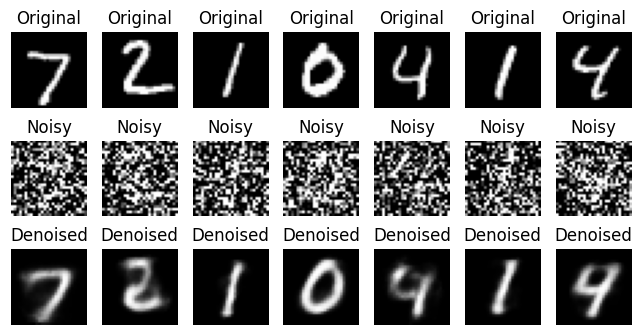

In [ ]:
# Number of images to display
num_images = 7

plt.figure(figsize=(8, 4))

for i in range(num_images):
    # Original Image
    plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Noisy Image
    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test_noisy[i], cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised Image
    plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(denoised_images[i], cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.show()
